In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
## SETTINGS

# Paths
SET_datapath = "data_pp_sample.json"

In [15]:
df = pd.read_json(SET_datapath, orient="columns")
df.head()

,comment_text,toxic,sentence_lengths
0,barnstar you! 1px solid 3px 3px 0 graphic barn...,0,12
1,idiot editor actually got vandalism putting wo...,1,10
2,"lexx v lexx please use lexx refering example, ...",0,310
3,notable resident past come article list living...,0,59
4,scanned photo elson book flatbed unfortunately...,0,32


In [4]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=2500)
X = vectorizer.fit_transform(df["comment_text"].values.tolist()).toarray()
y = df['toxic'].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=99)

In [6]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (250188, 2500)
X_test shape: (62547, 2500)
y_train shape: (250188,)
y_test shape: (62547,)


In [8]:
def model_train(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    y_pred_tr = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("--------------------Training Performance---------------------")
    print(accuracy_score(y_train,y_pred_tr))
    print(classification_report(y_train,y_pred_tr))
    print("-------------------------------------------------------------")
    print("--------------------Testing Performance----------------------")
    print(accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    
    sns.heatmap(confusion_matrix(y_test, y_pred),cmap='viridis',annot=True,fmt='.4g')
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    plt.show()

## Naive Bayes:

--------------------Training Performance---------------------
0.7306345628087678
              precision    recall  f1-score   support

           0       0.72      0.95      0.82    161759
           1       0.79      0.32      0.46     88429

    accuracy                           0.73    250188
   macro avg       0.76      0.64      0.64    250188
weighted avg       0.75      0.73      0.69    250188

-------------------------------------------------------------
--------------------Testing Performance----------------------
0.730826418533263
              precision    recall  f1-score   support

           0       0.72      0.95      0.82     40406
           1       0.79      0.32      0.46     22141

    accuracy                           0.73     62547
   macro avg       0.76      0.64      0.64     62547
weighted avg       0.75      0.73      0.69     62547



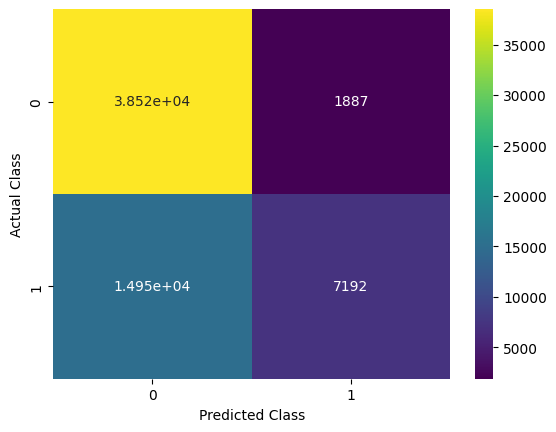

In [11]:
modelNB = MultinomialNB()
model_train(modelNB, X_train, X_test, y_train, y_test)

## Logistic Regression (Best Model) :

--------------------Training Performance---------------------
0.7348953586902649
              precision    recall  f1-score   support

           0       0.72      0.96      0.82    161759
           1       0.80      0.33      0.47     88429

    accuracy                           0.73    250188
   macro avg       0.76      0.64      0.65    250188
weighted avg       0.75      0.73      0.70    250188

-------------------------------------------------------------
--------------------Testing Performance----------------------
0.7329208435256687
              precision    recall  f1-score   support

           0       0.72      0.96      0.82     40406
           1       0.80      0.33      0.46     22141

    accuracy                           0.73     62547
   macro avg       0.76      0.64      0.64     62547
weighted avg       0.75      0.73      0.70     62547



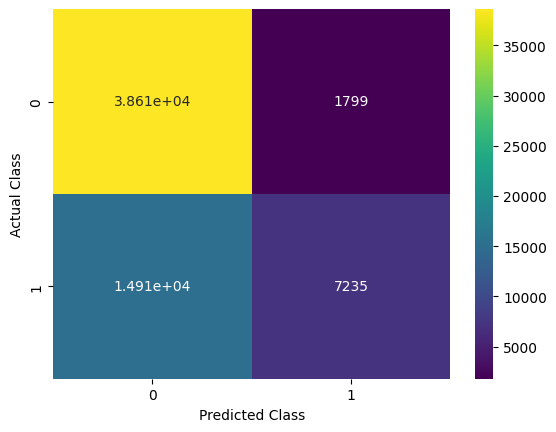

In [12]:
modelLR = LogisticRegression(max_iter=1000)
model_train(modelLR, X_train, X_test, y_train, y_test)

## Random forest:

--------------------Training Performance---------------------
0.6955209682318896
              precision    recall  f1-score   support

           0       0.68      1.00      0.81    161759
           1       0.98      0.14      0.25     88429

    accuracy                           0.70    250188
   macro avg       0.83      0.57      0.53    250188
weighted avg       0.78      0.70      0.61    250188

-------------------------------------------------------------
--------------------Testing Performance----------------------
0.6914480310806274
              precision    recall  f1-score   support

           0       0.68      1.00      0.81     40406
           1       0.96      0.13      0.24     22141

    accuracy                           0.69     62547
   macro avg       0.82      0.57      0.52     62547
weighted avg       0.78      0.69      0.60     62547



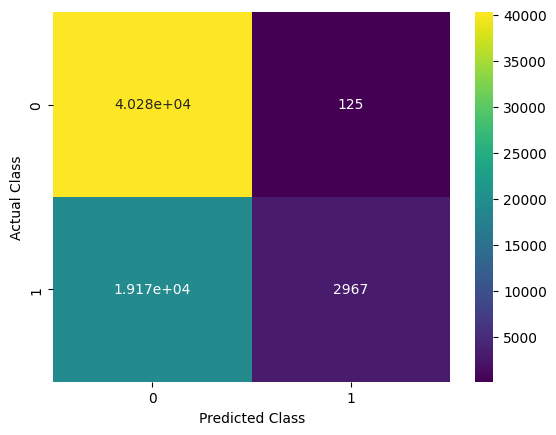

In [13]:
model = RandomForestClassifier(n_estimators=100,max_depth=15,max_features='sqrt')
model_train(model, X_train, X_test, y_train, y_test)